# 學習器大評比 #
## 兩群資料的情況 ##

### 生成資料 ###
### 資料一 ###

In [13]:
air = '/Users/liang/Documents/統計數學與運算/images'
dataset= '/Users/liang/Documents/統計數學與運算/生成資料集'

In [69]:
from scipy import stats as stat
import numpy as np
def genmnlrvs(n1,n2,m1,m2,Cov1,Cov2): #生成資料的函數
    mvn1=stat.multivariate_normal(mean=m1,cov=Cov1)
    mvn2=stat.multivariate_normal(mean=m2,cov=Cov2)
    A,B=mvn1.rvs(n1),mvn2.rvs(n2)
    X=np.vstack((A,B))
    y=np.hstack((np.zeros(n1),np.ones(n2)))
    return X,y

In [70]:
n1, n2 = 150, 150
m1, m2 = np.array([0, 0]), np.array([2.7, 2.4])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)

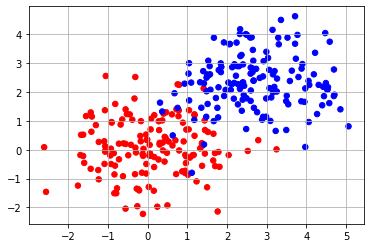

In [71]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data1.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data1.pdf',format='pdf')
plt.show()

In [72]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data1.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.0439
LDA testing Error:0.0452
QDA training Error:0.0427
QDA testing Error:0.0430
KNN5 training Error:0.0420
KNN5 testing Error:0.0528
KNN15 training Error:0.0498
KNN15 testing Error:0.0510
ANN10 training Error:0.0435
ANN10 testing Error:0.0445
ANN20 training Error:0.0447
ANN20 testing Error:0.0453
LOGISTIC training Error:0.0427
LOGISTIC testing Error:0.0445


### 資料二 ###

In [74]:
n1, n2 = 150, 150
m1, m2 = np.array([1.5, 1.8]), np.array([2.5, 2.2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)

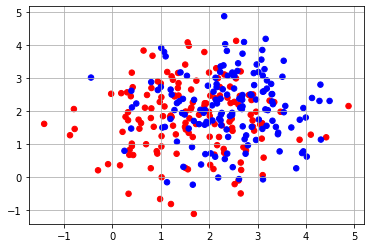

In [79]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data2.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data2.pdf',format='pdf')
plt.show()

In [80]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data2.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.3388
LDA testing Error:0.3430
QDA training Error:0.3440
QDA testing Error:0.3463
KNN5 training Error:0.2647
KNN5 testing Error:0.4100
KNN15 training Error:0.3426
KNN15 testing Error:0.4027
ANN10 training Error:0.3445
ANN10 testing Error:0.3490
ANN20 training Error:0.3444
ANN20 testing Error:0.3497
LOGISTIC training Error:0.3385
LOGISTIC testing Error:0.3417


### 資料三 ###

In [85]:
n1, n2 = 150, 150
m1, m2 = np.array([1.0, 1.0]), np.array([1.0, 1.0])
Cov1 = np.array([[1, -2], [-2, 6]])
Cov2 = np.array([[5, 4], [4, 5]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)

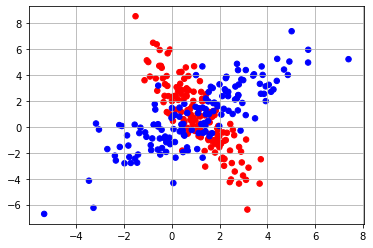

In [86]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data3.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data3.pdf',format='pdf')
plt.show()

In [87]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data3.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.4717
LDA testing Error:0.5558
QDA training Error:0.1332
QDA testing Error:0.1398
KNN5 training Error:0.1298
KNN5 testing Error:0.1970
KNN15 training Error:0.1361
KNN15 testing Error:0.1612
ANN10 training Error:0.1425
ANN10 testing Error:0.1602
ANN20 training Error:0.1578
ANN20 testing Error:0.1737
LOGISTIC training Error:0.4718
LOGISTIC testing Error:0.5563


### 資料四 ###

In [88]:
n1, n2 = 150, 150
m1, m2 = np.array([1.0, 1.0]), np.array([2.0, 2.0])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[0.5,0 ], [0, 0.5]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)

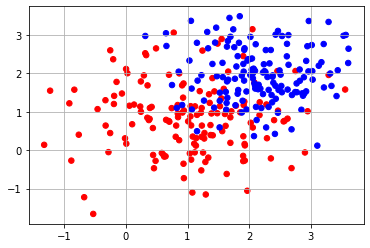

In [89]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data4.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data4.pdf',format='pdf')
plt.show()

In [90]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data4.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.1580
LDA testing Error:0.1538
QDA training Error:0.1635
QDA testing Error:0.1640
KNN5 training Error:0.1479
KNN5 testing Error:0.1945
KNN15 training Error:0.1520
KNN15 testing Error:0.1685
ANN10 training Error:0.1531
ANN10 testing Error:0.1522
ANN20 training Error:0.1541
ANN20 testing Error:0.1535
LOGISTIC training Error:0.1599
LOGISTIC testing Error:0.1547


## 三群資料的情況 ##
### 資料五 ###

In [91]:
from scipy import stats as stat
import numpy as np

def genmnlthreervs(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3): #生成資料的函數
    mvn1=stat.multivariate_normal(mean=m1,cov=Cov1)
    mvn2=stat.multivariate_normal(mean=m2,cov=Cov2)
    mvn3=stat.multivariate_normal(mean=m3,cov=Cov3)
    A,B,C=mvn1.rvs(n1),mvn2.rvs(n2),mvn3.rvs(n3)
    X=np.vstack((A,B,C))
    two=np.ones(n3)
    for i in np.arange(n3):
        two[i]=2
    y = np.hstack((np.zeros(n1), np.ones(n2), two))
    return X,y

In [103]:
n1, n2, n3 = 200, 200, 200
m1, m2, m3 = np.array([2.7, 5]), np.array([3, 2]),np.array([5,7])
Cov1 = np.array([[1, 0.9], [0.9, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
Cov3 = np.array([[1, 0.4], [0.4, 1]])
X,y=genmnlthreervs(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3)

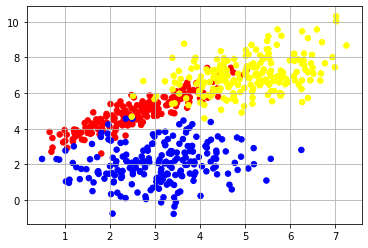

In [104]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data5.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data5.pdf',format='pdf')
plt.show()

In [97]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data5.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.0859
LDA testing Error:0.0862
QDA training Error:0.0751
QDA testing Error:0.0757
KNN5 training Error:0.0707
KNN5 testing Error:0.0828
KNN15 training Error:0.0739
KNN15 testing Error:0.0760
ANN10 training Error:0.0774
ANN10 testing Error:0.0801
ANN20 training Error:0.0782
ANN20 testing Error:0.0815
LOGISTIC training Error:0.0803
LOGISTIC testing Error:0.0825


### 資料六 ###

In [98]:
n1, n2, n3 = 200, 200, 200
m1, m2, m3 = np.array([2.7, 3.5]), np.array([3, 2]),np.array([4.2,1.9])
Cov1 = np.array([[1, 0.9], [0.9, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
Cov3 = np.array([[1, 0.4], [0.4, 1]])
X,y=genmnlthreervs(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3)

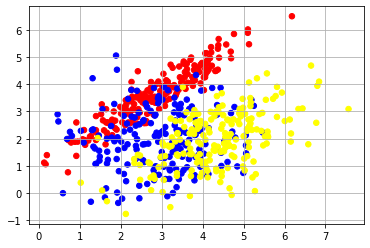

In [99]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data6.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data6.pdf',format='pdf')
plt.show()

In [101]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data6.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.2887
LDA testing Error:0.2909
QDA training Error:0.2530
QDA testing Error:0.2578
KNN5 training Error:0.2095
KNN5 testing Error:0.3033
KNN15 training Error:0.2487
KNN15 testing Error:0.2800
ANN10 training Error:0.2597
ANN10 testing Error:0.2655
ANN20 training Error:0.2626
ANN20 testing Error:0.2692
LOGISTIC training Error:0.2707
LOGISTIC testing Error:0.2732


### 資料七 ###

In [105]:
n1, n2, n3 = 200, 200, 200
m1, m2, m3 = np.array([2.7, 5]), np.array([3, 2]),np.array([5,7])
Cov1 = np.array([[1, -2], [-2, 6]])
Cov2 = np.array([[5, 4], [4, 5]])
Cov3 = np.array([[9, 6], [6, 9]])
X,y=genmnlthreervs(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3)

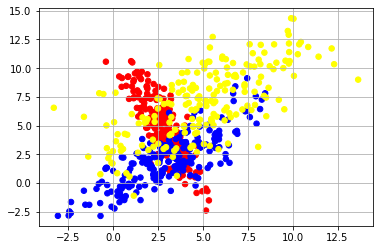

In [106]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data7.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data7.pdf',format='pdf')
plt.show()

In [107]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data7.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.2899
LDA testing Error:0.2880
QDA training Error:0.2215
QDA testing Error:0.2233
KNN5 training Error:0.1869
KNN5 testing Error:0.2703
KNN15 training Error:0.2215
KNN15 testing Error:0.2445
ANN10 training Error:0.2236
ANN10 testing Error:0.2363
ANN20 training Error:0.2222
ANN20 testing Error:0.2313
LOGISTIC training Error:0.2942
LOGISTIC testing Error:0.2899


### 資料八 ###

In [108]:
n1, n2, n3 = 200, 200, 200
m1, m2, m3 = np.array([2.7, 5]), np.array([3, 2]),np.array([5,7])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
X,y=genmnlthreervs(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3)

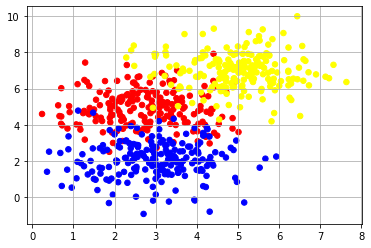

In [109]:
import matplotlib.pyplot as plt
np.savetxt(dataset+'/hw7_data8.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.savefig(air+'/hw7data8.pdf',format='pdf')
plt.show()

In [110]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as LA 
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
D = np.loadtxt( dataset+'/hw7_data8.txt')
X = D[:, 0:2]
y = D[:,2]

K=100 #bootstrapping K times
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)
LDA_trainingErr,LDA_testingErr=np.zeros(K),np.zeros(K)
QDA_trainingErr,QDA_testingErr=np.zeros(K),np.zeros(K)
KNN5_trainingErr,KNN5_testingErr=np.zeros(K),np.zeros(K)
KNN15_trainingErr,KNN15_testingErr=np.zeros(K),np.zeros(K)
ANN10_trainingErr,ANN10_testingErr=np.zeros(K),np.zeros(K)
ANN20_trainingErr,ANN20_testingErr=np.zeros(K),np.zeros(K)
LOGISTIC_trainingErr,LOGISTIC_testingErr=np.zeros(K),np.zeros(K)

#學習器設定
Lda=LinearDiscriminantAnalysis(tol=1e-6)
Qda=QuadraticDiscriminantAnalysis(tol=1e-6,store_covariance=True)
Knn5=neighbors.KNeighborsClassifier(5,weights='uniform')
Knn15=neighbors.KNeighborsClassifier(15,weights='uniform')
Logistic=LogisticRegression()

opts=dict(max_iter=10000,solver='adam',verbose=False,activation='logistic',tol=1e-6)
Ann10=MLPClassifier(hidden_layer_sizes=(10,),**opts)
Ann20=MLPClassifier(hidden_layer_sizes=(20,),**opts)

for i in range(K):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(x_train,y_train)
        Qda.fit(x_train,y_train)
        Knn5.fit(x_train,y_train)
        Knn15.fit(x_train,y_train)
        Ann10.fit(x_train,y_train)
        Ann20.fit(x_train,y_train)
        Logistic.fit(x_train,y_train)

        LDA_trainingErr[i]=1-Lda.score(x_train,y_train)
        LDA_testingErr[i]=1-Lda.score(x_test,y_test)
        QDA_trainingErr[i]=1-Qda.score(x_train,y_train)
        QDA_testingErr[i]=1-Qda.score(x_test,y_test)
        KNN5_trainingErr[i]=1-Knn5.score(x_train,y_train)
        KNN5_testingErr[i]=1-Knn5.score(x_test,y_test)
        KNN15_trainingErr[i]=1-Knn15.score(x_train,y_train)
        KNN15_testingErr[i]=1-Knn15.score(x_test,y_test)
        ANN10_trainingErr[i]=1-Ann10.score(x_train,y_train)
        ANN10_testingErr[i]=1-Ann10.score(x_test,y_test)
        ANN20_trainingErr[i]=1-Ann20.score(x_train,y_train)
        ANN20_testingErr[i]=1-Ann20.score(x_test,y_test)
        LOGISTIC_trainingErr[i]=1-Logistic.score(x_train,y_train)
        LOGISTIC_testingErr[i]=1-Logistic.score(x_test,y_test)

print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN10 training Error:{:.4f}'.format(ANN10_trainingErr.mean()))
print('ANN10 testing Error:{:.4f}'.format(ANN10_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(ANN20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(ANN20_testingErr.mean()))
print('LOGISTIC training Error:{:.4f}'.format(LOGISTIC_trainingErr.mean()))
print('LOGISTIC testing Error:{:.4f}'.format(LOGISTIC_testingErr.mean()))



LDA training Error:0.0869
LDA testing Error:0.0885
QDA training Error:0.0886
QDA testing Error:0.0926
KNN5 training Error:0.0760
KNN5 testing Error:0.1073
KNN15 training Error:0.0869
KNN15 testing Error:0.0970
ANN10 training Error:0.0889
ANN10 testing Error:0.0934
ANN20 training Error:0.0893
ANN20 testing Error:0.0929
LOGISTIC training Error:0.0873
LOGISTIC testing Error:0.0917
